# Uso de PCA para revisar la separación lineal

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

En este notebook se explica el uso de PCA la ver la separación lineal en un set de datos que contiene más de 2 características.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (2.0.2)
- sklearn (1.6.1)
- matplotlib (3.10.2)
- seaborn (0.13.2)
Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples

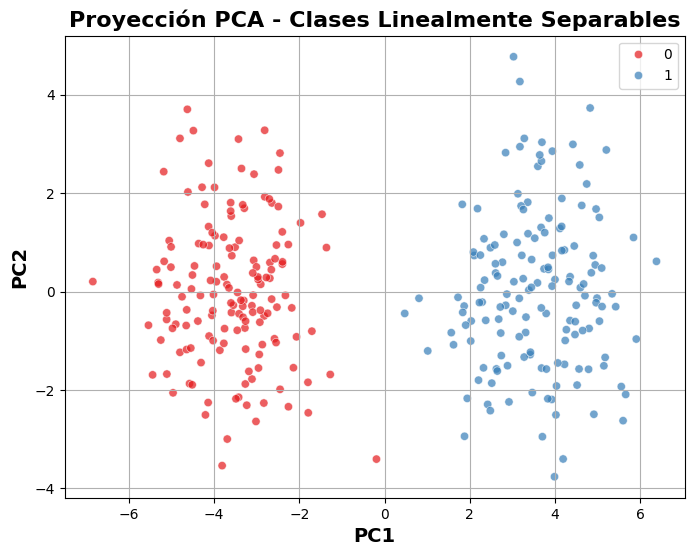

Accuracy en PCA 2D con Regresión Logística: 1.0


In [7]:
# Generar datos con 6 variables predictoras, 2 clases, y linealmente separables
X, y = make_classification(n_samples=300, n_features=6, n_informative=4,
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.5, random_state=29)

# Aplicar PCA para reducción a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualización
plt.figure(figsize=(8, 6))
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", alpha=0.7)
plt.title("Proyección PCA - Clases Linealmente Separables", fontsize=16, fontweight="bold")
plt.xlabel("PC1", fontsize=14, fontweight="bold")
plt.ylabel("PC2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

# Clasificador lineal para comprobar separación
clf = LogisticRegression()
clf.fit(X_pca, y)
y_pred = clf.predict(X_pca)
print("Accuracy en PCA 2D con Regresión Logística:", accuracy_score(y, y_pred))


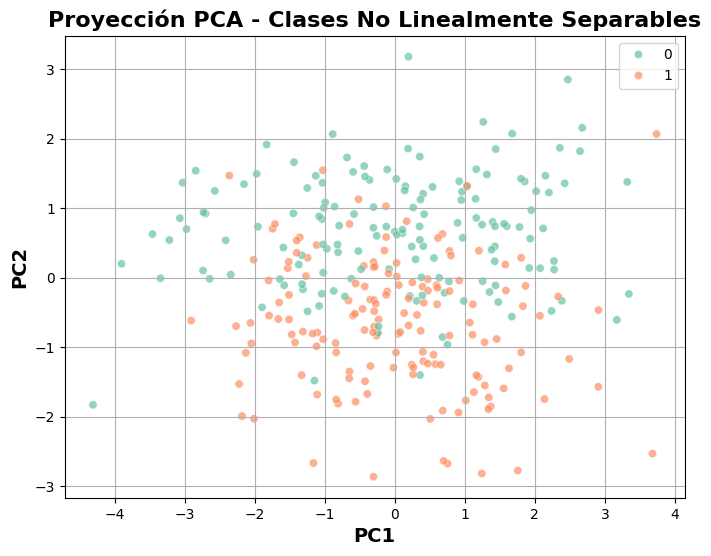

Accuracy en PCA 2D con Regresión Logística: 0.7633333333333333


In [8]:
# Generar datos con menos separación entre clases
X2, y2 = make_classification(n_samples=300, n_features=6, n_informative=3,
                             n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=29)

# PCA a 2 dimensiones
X2_pca = pca.fit_transform(X2)

# Visualización
plt.figure(figsize=(8, 6))
sb.scatterplot(x=X2_pca[:, 0], y=X2_pca[:, 1], hue=y2, palette="Set2", alpha=0.7)
plt.title("Proyección PCA - Clases No Linealmente Separables", fontsize=16, fontweight="bold")
plt.xlabel("PC1", fontsize=14, fontweight="bold")
plt.ylabel("PC2", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()

# Clasificación lineal
clf2 = LogisticRegression()
clf2.fit(X2_pca, y2)
y2_pred = clf2.predict(X2_pca)
print("Accuracy en PCA 2D con Regresión Logística:", accuracy_score(y2, y2_pred))


In [10]:
# Para los datos linealmente separables
ls_score = silhouette_score(X_pca, y)
print("Silhouette score (clases linealmente separables):", ls_score)

# Para los datos no linealmente separables
lns_score = silhouette_score(X2_pca, y2)
print("Silhouette score (clases NO linealmente separables):", lns_score)


Silhouette score (clases linealmente separables): 0.6811831979135644
Silhouette score (clases NO linealmente separables): 0.13153600939552149


In [15]:
def plot_silhouette(X : np.array, labels : np.array, title : str):
    silhouette_vals = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)
    n_clusters = len(np.unique(labels))

    y_lower = 10
    plt.figure(figsize=(8, 5))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # space between clusters

    plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Promedio")
    plt.xlabel("Coeficiente de silueta", fontsize=14, fontweight="bold")
    plt.ylabel("Etiqueta de clase", fontsize=14, fontweight="bold")
    plt.title(title, fontsize=16, fontweight="bold")
    plt.legend()
    plt.tight_layout()
    plt.show()


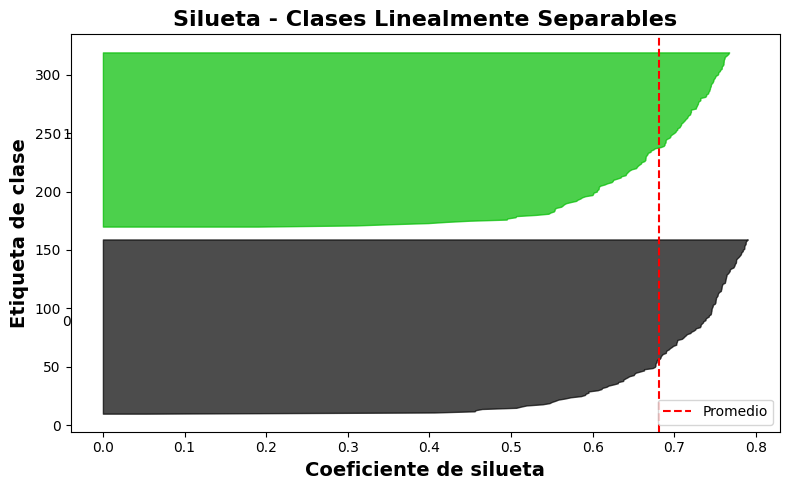

In [16]:
plot_silhouette(X_pca, y, "Silueta - Clases Linealmente Separables")

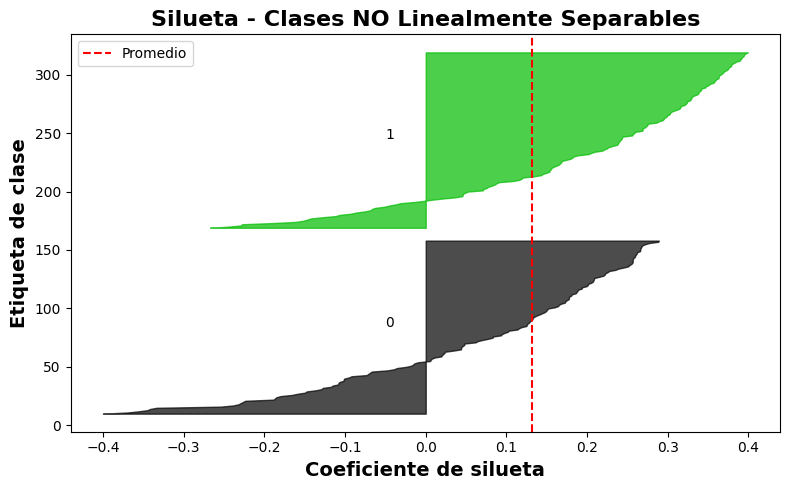

In [17]:
plot_silhouette(X2_pca, y2, "Silueta - Clases NO Linealmente Separables")


# Comentarios

+ Si los puntos proyectados en el espacio PCA pueden ser separados fácilmente por una línea (2D) o hiperplano (más dimensiones), decimos que son linealmente separables.

+ La regresión logística en 2D es una buena forma de comprobar si existe separación lineal, ¿cómo?: si el accuracy es cercano a 1, entonces el modelo lineal está funcionando bien.

+ **Índice Silhouette cerca de +1**: la muestra está bien ubicada dentro de su clase y lejos de otras.

+ **Índice Silhouette cerca de 0**: la muestra está en el límite entre clases (superposición).

+ **Índice Silhouette negativo**: la muestra podría estar mal clasificada o mal agrupada.